In [3]:
import soundfile as sf #Libreria para el analisis de audio compatible con numpy
import numpy as np
import matplotlib.pyplot as plt
import os #Modulo para el uso de funciones del sistema operativo
import pandas as pd
from scipy.signal import find_peaks

## Importamos los aechivos de la carpeta
Para importar los archivos realizamos el siguiente proceso:
1- Obtenemos los nombres de los archivos de la carpeta.
2-. Obtenemos la ruta de cada uno de los archivos y las guardamos en un arreglo
3-. Con la ruta y u ciclo for, importamos cada uno de los archivos al script y realizamos la operacion.

In [4]:
#Obtenemos la lista de los nombres de la carpeta con los audios
ruta = r"C:\Users\usuario\Downloads\Proyecto\Phonemas"
Audios = os.listdir(ruta)
#Obtenemos las direcciones de los audios concatenando los nombres de los phonemas con la ruta de la carpeta
Phonemas = [os.path.join(ruta, archivo) for archivo in Audios]
#Utilizamos la funcion split para eliminar el formato.wav de los nombres
audios_sf = [nombre.split(".wav")[0] for nombre in Audios]
#print(Phonemas)
print(audios_sf)

#DEclaramos una matris con el tamaño de los fonemas
prim_arm = np.zeros(len(Phonemas))
seg_arm = np.zeros(len(Phonemas))
ter_arm = np.zeros(len(Phonemas))
print(len(prim_arm))

['A10_10', 'A10_12', 'A10_14', 'A10_15', 'A10_16', 'A11_12', 'A11_14', 'A11_16', 'A11_17', 'A12_1', 'A13_1', 'A13_10', 'A13_17', 'A13_18', 'A13_20', 'A13_3', 'A13_4', 'A13_5', 'A13_6', 'A13_9', 'A14_1', 'A14_17', 'A14_18', 'A14_2', 'A14_20', 'A14_3', 'A14_4', 'A14_5', 'A14_6', 'A14_9', 'A15_1', 'A15_15', 'A15_19', 'A15_2', 'A15_3', 'A15_5', 'A15_8', 'A1_13', 'A2_10', 'A2_8', 'A3_3', 'A3_6', 'A3_8', 'A4_5', 'A5_10', 'A5_13', 'A6_10', 'A6_13', 'A9_10', 'A9_12', 'A9_14', 'A9_15', 'A9_17', 'E10_12', 'E10_13', 'E10_14', 'E10_15', 'E10_16', 'E11_12', 'E11_14', 'E11_16', 'E11_17', 'E12_1', 'E13_1', 'E13_10', 'E13_17', 'E13_18', 'E13_2', 'E13_20', 'E13_3', 'E13_4', 'E13_5', 'E13_6', 'E13_9', 'E14_1', 'E14_17', 'E14_18', 'E14_2', 'E14_20', 'E14_3', 'E14_4', 'E14_5', 'E14_6', 'E14_9', 'E15_1', 'E15_15', 'E15_17', 'E15_19', 'E15_2', 'E15_3', 'E15_5', 'E15_9', 'E1_13', 'E2_10', 'E2_8', 'E3_3', 'E3_6', 'E3_8', 'E4_5', 'E5_10', 'E5_13', 'E6_10', 'E6_13', 'E7_7', 'E8_9', 'E9_10', 'E9_12', 'E9_14', 'E

Ya que tenemos las rutas guardadas en la variable Phonemas, podemos proceder importar cada uno de los audios de manera individual y aplicarle su correspondiente transformada de Fourier. Para ello, primero definimos los parametros iniciales y despues procedemos a los calculos.

In [5]:
for i in range(len(Phonemas)):
    #X es el valor de los datos rescatados del audio, Fs es la frecuencia de muestreo utilizada en cada audio
    x, Fs = sf.read(Phonemas[i]) 
    X = np.fft.fft(x)
    Spectre = np.fft.fftshift(np.abs(X))
    N = len(Spectre) 
    w = np.linspace(-Fs/2,Fs/2,N)
    plt.figure()
    plt.plot(w, Spectre)
    plt.savefig(os.path.join(r"C:\Users\usuario\Downloads\Proyecto\Transformadas_phonemas", f"TF_" + audios_sf[i]))
    plt.close()
    #Encontramos el indice del valor maximo del arreglo del espectro
    picos, _= find_peaks(Spectre, distance = 100)
    #print(picos)
    picos_ordenados = sorted(picos, key=lambda i: Spectre[i], reverse=True) #utilizamos sorted para organizar las frecuencias
    primero = picos_ordenados[1]
    Segundo = picos_ordenados[3]
    Tercero = picos_ordenados[5]

    prim_arm[i] = np.abs(w[primero]) #le pongo el valor absoluto porque algunos picos quedan en frecuencias negativas, para obtener el valor real
    seg_arm[i] = np.abs(w[Segundo])
    ter_arm[i] = np.abs(w[Tercero])

Para poder almacenar los datos usamos un dataframe, donde almacenamos el indice, el nombre del archivo y el 

In [6]:
idAud = pd.DataFrame(audios_sf,columns= ['No. Paciente'])
Primer_armonico = pd.DataFrame(prim_arm, columns= ['Frecuencia del primer armonico'])
Segundo_armonico = pd.DataFrame(seg_arm, columns= ['Frecuencia del segundo armonico'])
Tercer_armonico = pd.DataFrame(ter_arm, columns= ['Frecuencia tercer armonico'])

dataframe = pd.concat([idAud,Primer_armonico, Segundo_armonico, Tercer_armonico], axis = 1)
#print(dataframe)

Vocal = dataframe.groupby(dataframe["No. Paciente"].str[0])
dataframes_por_letra = []

#Revisar esta estructura.
for letra, grupo in Vocal:
    dataframes_por_letra.append(grupo)

Vocales = ['a', 'e', 'i', 'm', 'o', 'u']

#Guardamos cada uno de los datasets obtenidos en un excel de manera individual
for i in range (len(Vocales)):
    dataframes_por_letra[i].to_excel('Transformdas_{}.xlsx'.format(Vocales[i]))



In [7]:
a = dataframes_por_letra[0]
e = dataframes_por_letra[1]
i = dataframes_por_letra[2]
m = dataframes_por_letra[3]
o = dataframes_por_letra[4]
u = dataframes_por_letra[5]

cols = []
#Separamos los dataframes en cada uno de los 18 armonicos (3 por cada phonema)
pa_a = a["Frecuencia del primer armonico"].values
sa_a = a["Frecuencia del segundo armonico"].values
ta_a = a["Frecuencia tercer armonico"].values

pa_e = e["Frecuencia del primer armonico"].values
sa_e = e["Frecuencia del segundo armonico"].values
ta_e = e["Frecuencia tercer armonico"].values

pa_i = i["Frecuencia del primer armonico"].values
sa_i = i["Frecuencia del segundo armonico"].values
ta_i = i["Frecuencia tercer armonico"].values

pa_m = m["Frecuencia del primer armonico"].values
sa_m = m["Frecuencia del segundo armonico"].values
ta_m = m["Frecuencia tercer armonico"].values

pa_o = o["Frecuencia del primer armonico"].values
sa_o = o["Frecuencia del segundo armonico"].values
ta_o = o["Frecuencia tercer armonico"].values

pa_u = u["Frecuencia del primer armonico"].values
sa_u = u["Frecuencia del segundo armonico"].values
ta_u = u["Frecuencia tercer armonico"].values

# Calculamos la curtosis 
Primero definimos funciones para los momentos y las operaciones de kurtosis y skewness

In [8]:
def first_momentum(datos, mean):
    res = 0
    for i in range(len(datos)):
        res = res + (datos[i])
        first = res / len(datos)
    return first 

def second_momentum(datos, mean):
    res = 0
    for i in range(len(datos)):
        res = res + np.power((datos[i] - mean),2)
        second = res / len(datos)
    return second 

def third_momentum(datos, mean):
    res = 0
    for i in range(len(datos)):
        res = res + np.power((datos[i] - mean),3)
        third = res / len(datos)
    return third 

def fourth_momentum(datos, mean):
    res = 0
    for i in range(len(datos)):
        res = res + np.power((datos[i] - mean),4)
        fourth = res / len(datos)
    return fourth 

def kurt(second, fourth):
    kurtosis = fourth / (np.power(np.sqrt(second),4))
    return kurtosis

def skew(second, third):
    skewn = third / (np.power(np.sqrt(second),3))
    return skewn


Aplicamos las funciones antes definidas

In [10]:
means = np.array([  [541.0361,447.9764,276.9061,442.6011,323.0901,236.5687],
                    [558.624,308.033, 361.05,367.279,385.839,381.066], 
                    [739.403,797.573,1281.84,646.697,600.928,735.351]])

segundo = np.empty((3, 6))

segundo[0,0] = second_momentum(pa_a, means[0,0])
segundo[0,1] = second_momentum(pa_e, means[0,1])
segundo[0,2] = second_momentum(pa_i, means[0,2])
segundo[0,3] = second_momentum(pa_m, means[0,3])
segundo[0,4] = second_momentum(pa_o, means[0,4])
segundo[0,5] = second_momentum(pa_u, means[0,5])

segundo[1,0] = second_momentum(sa_a, means[1,0])
segundo[1,1] = second_momentum(sa_e, means[1,1])
segundo[1,2] = second_momentum(sa_i, means[1,2])
segundo[1,3] = second_momentum(sa_m, means[1,3])
segundo[1,4] = second_momentum(sa_o, means[1,4])
segundo[1,5] = second_momentum(sa_u, means[1,5])

segundo[2,0] = second_momentum(ta_a, means[2,0])
segundo[2,1] = second_momentum(ta_e, means[2,1])
segundo[2,2] = second_momentum(ta_i, means[2,2])
segundo[2,3] = second_momentum(ta_m, means[2,3])
segundo[2,4] = second_momentum(ta_o, means[2,4])
segundo[2,5] = second_momentum(ta_u, means[2,5])

print(segundo)


[[ 185333.8681983    30724.53417476    5378.67211757   48891.17383658
    26172.78003083   17613.28873292]
 [ 140967.2524719    19013.19898779   24980.72103602   22461.29840802
    40892.90513874   35636.09314355]
 [ 120681.89137911  598885.26644381 1232550.8613131   256327.67139985
    72055.82037643   65552.11072814]]


calculamos los terceros momentos

In [11]:
tercero = np.empty((3, 6))

tercero[0,0] = third_momentum(pa_a, means[0,0])
tercero[0,1] = third_momentum(pa_e, means[0,1])
tercero[0,2] = third_momentum(pa_i, means[0,2])
tercero[0,3] = third_momentum(pa_m, means[0,3])
tercero[0,4] = third_momentum(pa_o, means[0,4])
tercero[0,5] = third_momentum(pa_u, means[0,5])

tercero[1,0] = third_momentum(sa_a, means[1,0])
tercero[1,1] = third_momentum(sa_e, means[1,1])
tercero[1,2] = third_momentum(sa_i, means[1,2])
tercero[1,3] = third_momentum(sa_m, means[1,3])
tercero[1,4] = third_momentum(sa_o, means[1,4])
tercero[1,5] = third_momentum(sa_u, means[1,5])

tercero[2,0] = third_momentum(ta_a, means[2,0])
tercero[2,1] = third_momentum(ta_e, means[2,1])
tercero[2,2] = third_momentum(ta_i, means[2,2])
tercero[2,3] = third_momentum(ta_m, means[2,3])
tercero[2,4] = third_momentum(ta_o, means[2,4])
tercero[2,5] = third_momentum(ta_u, means[2,5])

calculamos el cuarto momento

In [12]:
cuarto = np.empty((3, 6))

cuarto[0,0] = fourth_momentum(pa_a, means[0,0])
cuarto[0,1] = fourth_momentum(pa_e, means[0,1])
cuarto[0,2] = fourth_momentum(pa_i, means[0,2])
cuarto[0,3] = fourth_momentum(pa_m, means[0,3])
cuarto[0,4] = fourth_momentum(pa_o, means[0,4])
cuarto[0,5] = fourth_momentum(pa_u, means[0,5])

cuarto[1,0] = fourth_momentum(sa_a, means[1,0])
cuarto[1,1] = fourth_momentum(sa_e, means[1,1])
cuarto[1,2] = fourth_momentum(sa_i, means[1,2])
cuarto[1,3] = fourth_momentum(sa_m, means[1,3])
cuarto[1,4] = fourth_momentum(sa_o, means[1,4])
cuarto[1,5] = fourth_momentum(sa_u, means[1,5])

cuarto[2,0] = fourth_momentum(ta_a, means[2,0])
cuarto[2,1] = fourth_momentum(ta_e, means[2,1])
cuarto[2,2] = fourth_momentum(ta_i, means[2,2])
cuarto[2,3] = fourth_momentum(ta_m, means[2,3])
cuarto[2,4] = fourth_momentum(ta_o, means[2,4])
cuarto[2,5] = fourth_momentum(ta_u, means[2,5])

print(cuarto)

[[8.72016990e+10 2.36341996e+10 8.81930736e+07 3.08884713e+09
  2.02738490e+09 1.05411750e+09]
 [6.89327457e+10 1.12423159e+09 9.75590948e+08 2.94676149e+09
  5.46523628e+09 3.46856846e+09]
 [3.80969716e+10 2.09248075e+12 2.65226458e+12 8.15015480e+11
  1.13100217e+10 1.44983406e+10]]


calculamos la curtosis y skewness

In [13]:
curto = np.empty((3, 6))
sk = np.empty((3, 6))

for i in range(0,3):
    for j in range(0,6):
        curto[i,j] = kurt(segundo[i,j], cuarto[i,j])
        sk[i,j] = skew(segundo[i,j], tercero[i,j])

print(curto)

[[ 2.53872328 25.03630795  3.04848693  1.29221711  2.95962371  3.3978806 ]
 [ 3.46887865  3.10989265  1.56335578  5.84083946  3.26823301  2.73130437]
 [ 2.61581025  5.83410464  1.74585088 12.40437461  2.17833819  3.37399891]]


Pasamos a graficar los datos obtenidos

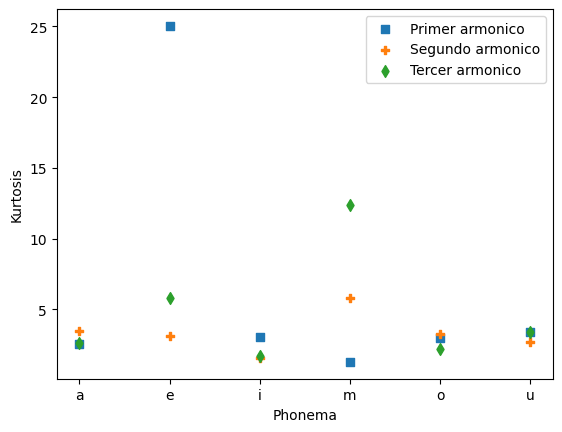

In [14]:
kurtosis_1a = curto[0,:]
kurtosis_2a = curto[1,:]
kurtosis_3a = curto[2,:]

plt.scatter(Vocales, kurtosis_1a, marker = "s", label = "Primer armonico")
plt.scatter(Vocales, kurtosis_2a, marker = "P", label = "Segundo armonico")
plt.scatter(Vocales, kurtosis_3a, marker = "d", label = "Tercer armonico")

plt.xlabel("Phonema")
plt.ylabel("Kurtosis")
plt.legend()
plt.show()

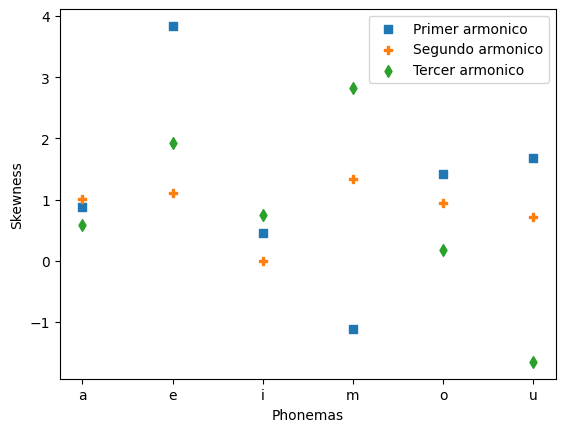

In [15]:
skew_1a = sk[0,:]
skew_2a = sk[1,:]
skew_3a = sk[2,:]

plt.scatter(Vocales, skew_1a, marker = "s", label = "Primer armonico")
plt.scatter(Vocales, skew_2a, marker = "P", label = "Segundo armonico")
plt.scatter(Vocales, skew_3a, marker= "d", label = "Tercer armonico" )

plt.xlabel("Phonemas")
plt.ylabel("Skewness")
plt.legend()
plt.show()

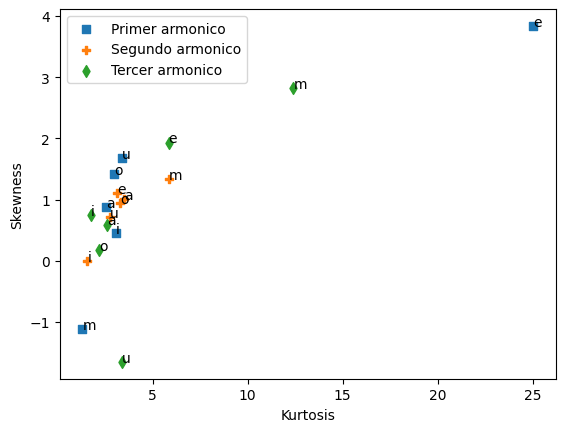

In [20]:
plt.scatter(kurtosis_1a, skew_1a, marker = "s", label = "Primer armonico")
plt.scatter(kurtosis_2a, skew_2a, marker = "P", label = "Segundo armonico")
plt.scatter(kurtosis_3a, skew_3a, marker= "d", label = "Tercer armonico" )
for i in range(len(kurtosis_1a)):
    plt.text(kurtosis_1a[i], skew_1a[i], Vocales[i] )
    plt.text(kurtosis_2a[i], skew_2a[i], Vocales[i] )
    plt.text(kurtosis_3a[i], skew_3a[i], Vocales[i] )
    
plt.xlabel("Kurtosis")
plt.ylabel("Skewness")
plt.legend()
plt.show()